# Importing Libraires and Dataset

In [ ]:
# Importing necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import random
from cv2 import resize
from glob import glob

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Specifiying set value for a specific option
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.precision', 3)

In [ ]:
# Importing Solar Panel's Data
ds = pd.read_csv('/content/solards.csv')

# Dataset Information

In [ ]:
# Sample Data
ds.sample(5)

,SR_NO,VOLTAGE,CURRENT,POWER,MODULE_TEMP,AMBIENT_TEMP,IR
3069,3070,19.21,0.06,1.18,556,417,1011
9,10,18.51,0.02,0.40,535,490,415
6095,6096,18.55,0.08,1.50,564,440,1011
2416,2417,19.53,0.04,0.81,541,416,1010
3073,3074,19.21,0.06,1.18,556,417,1013


In [ ]:
# Information about the dataset
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13415 entries, 0 to 13414
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SR_NO         13415 non-null  int64  
 1   VOLTAGE       13415 non-null  float64
 2   CURRENT       13415 non-null  float64
 3   POWER         13415 non-null  float64
 4   MODULE_TEMP   13415 non-null  int64  
 5   AMBIENT_TEMP  13415 non-null  int64  
 6   IR            13415 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 733.8 KB


In [ ]:
# Null Count for each column in the Dataset
ds.isnull().sum()

SR_NO           0
VOLTAGE         0
CURRENT         0
POWER           0
MODULE_TEMP     0
AMBIENT_TEMP    0
IR              0
dtype: int64

In [ ]:
# Description of the data in the DataFrame
ds.describe().style.background_gradient(cmap='rainbow')

,SR_NO,VOLTAGE,CURRENT,POWER,MODULE_TEMP,AMBIENT_TEMP,IR
count,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000
mean,6708.000000,12.261861,0.050212,0.547236,488.178830,412.829817,504.197391
std,3872.721265,7.431992,0.026437,0.430516,60.676151,16.860199,493.312944
min,1.000000,0.170000,-0.070000,-1.290000,173.000000,394.000000,0.000000
25%,3354.500000,4.390000,0.030000,0.210000,435.000000,400.000000,12.000000
50%,6708.000000,11.770000,0.050000,0.430000,444.000000,411.000000,404.000000
75%,10061.500000,19.410000,0.070000,0.810000,546.000000,422.000000,1011.000000
max,13415.000000,19.950000,0.140000,2.710000,639.000000,537.000000,1015.000000


# Data Visualization

Power Distribution

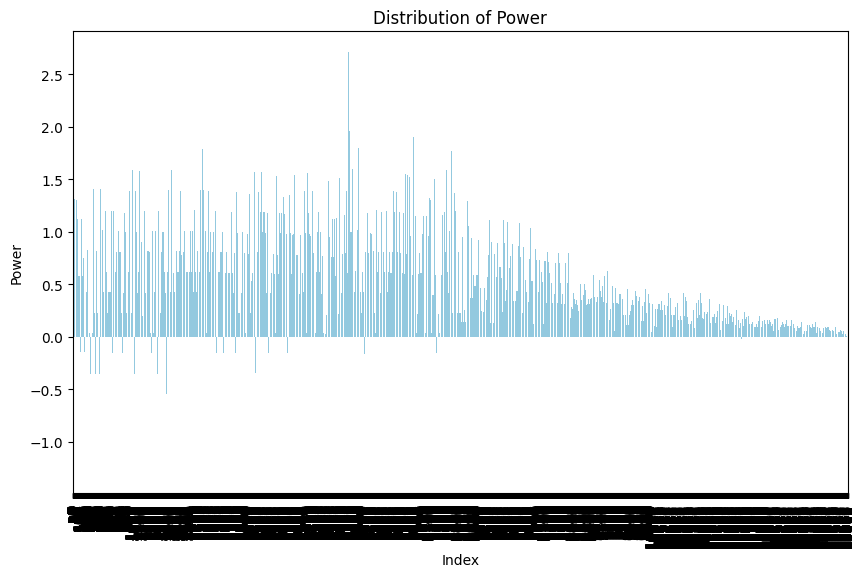

In [ ]:
# Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=ds.index, y="POWER", data=ds, color='skyblue')
plt.title('Distribution of Power')
plt.xlabel('Index')
plt.ylabel('Power')
plt.xticks(rotation=90)
plt.show()

Power vs Temperature

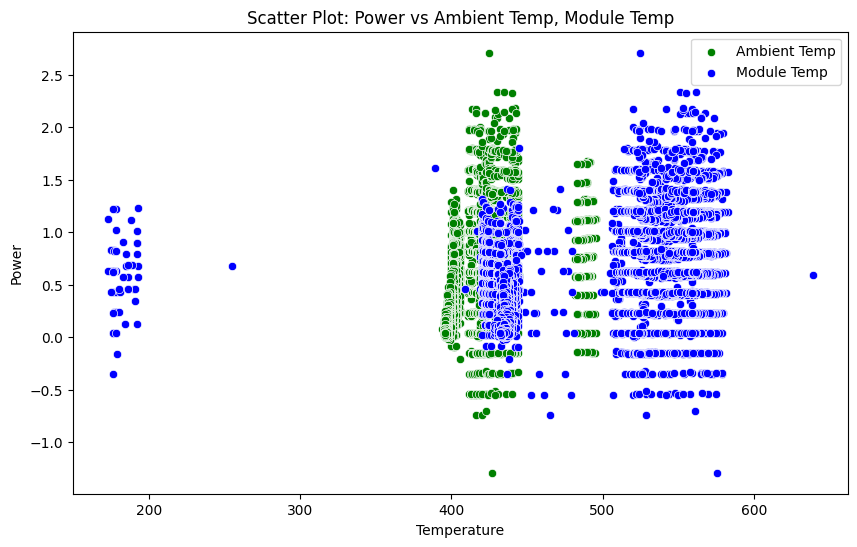

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="AMBIENT_TEMP", y="POWER", data=ds, color='green', label='Ambient Temp')
sns.scatterplot(x="MODULE_TEMP", y="POWER", data=ds, color='blue', label='Module Temp')
plt.title('Scatter Plot: Power vs Ambient Temp, Module Temp')
plt.xlabel('Temperature')
plt.ylabel('Power')
plt.legend()
plt.show()

Power vs IR Receiver

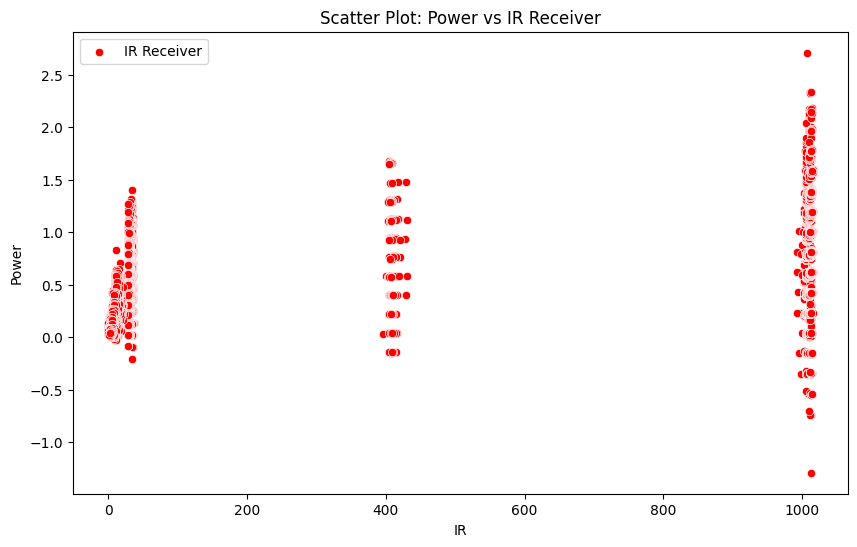

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="IR", y="POWER", data=ds, color='red', label='IR Receiver')
plt.title('Scatter Plot: Power vs IR Receiver')
plt.xlabel('IR')
plt.ylabel('Power')
plt.legend()
plt.show()

Power Distribution Histogram

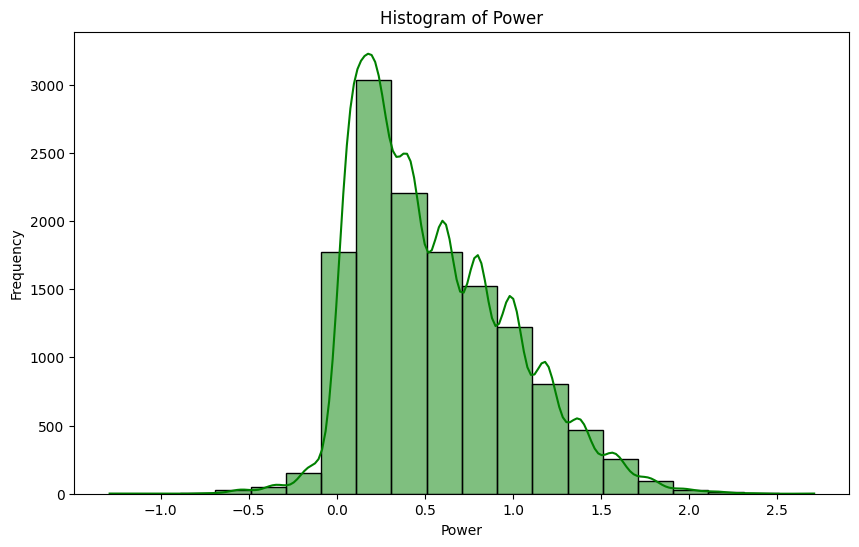

In [ ]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(ds["POWER"], bins=20, kde=True, color='green')
plt.title('Histogram of Power')
plt.xlabel('Power')
plt.ylabel('Frequency')
plt.show()

Linear Correlation Matrix

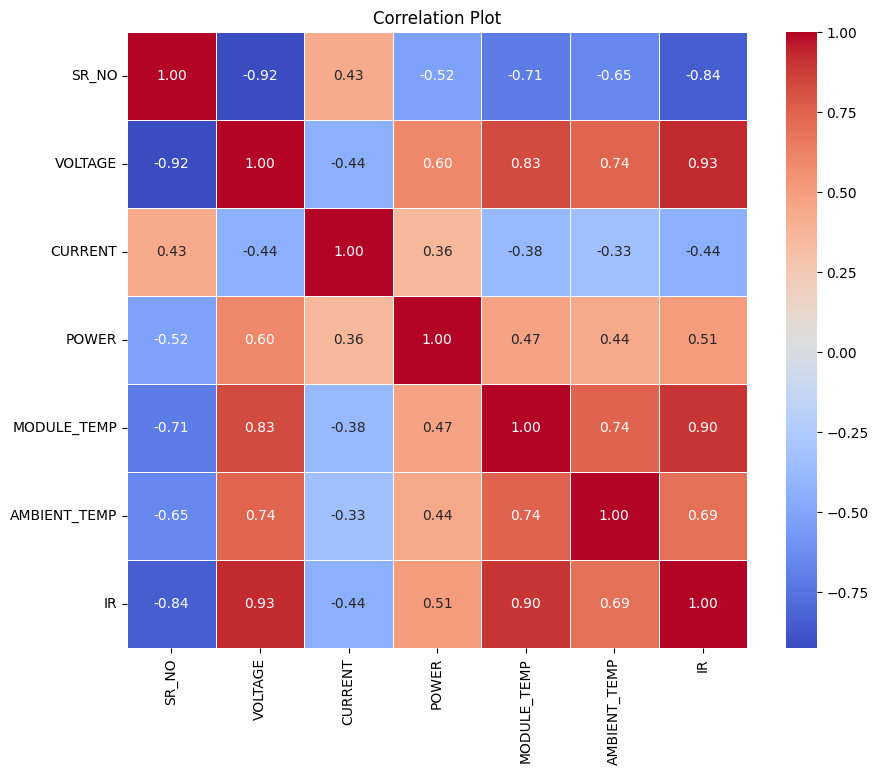

In [ ]:
# Compute the correlation matrix
corr = ds.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Plot')
plt.show()

# Training, Testing and Prediction

In [ ]:
# Creating a copy for Solar Panel Data
solar = ds.copy()

x = solar[['MODULE_TEMP','AMBIENT_TEMP','IR','CURRENT', "VOLTAGE"]]
y = solar['POWER']

In [ ]:
x.head()

,MODULE_TEMP,AMBIENT_TEMP,IR,CURRENT,VOLTAGE
0,579,488,414,0.07,18.51
1,536,489,415,0.01,18.51
2,536,489,412,0.06,18.48
3,535,489,416,0.07,18.51
4,535,490,413,0.04,18.48


In [ ]:
y.head()

0    1.32
1    0.22
2    1.13
3    1.32
4    0.77
Name: POWER, dtype: float64

Splitting into Training and Testing

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=21)

## Linear Regression

In [ ]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(x_train,y_train)

score_lr = 100*lr.score(x_test,y_test)
print(f'LR Model score = {score_lr:4.4f}%')

# R2 (coefficient of determination) for Linear Regression function

y_pred_lr = lr.predict(x_test)
R2_Score_lr = round(r2_score(y_pred_lr,y_test) * 100, 2)

print("R2 Score (LR): ",R2_Score_lr,"%")

LR Model score = 83.6835%
R2 Score (LR):  80.57 %


## Random Forest

In [ ]:
# Random Forest Regressor Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

# Calculate and print the raw score
raw_score_rfr = 100 * rfr.score(x_test, y_test)
print(f'RF Model Raw Score: {raw_score_rfr:4.4f}%')

# Calculate and print the R2 score
y_pred_rfr = rfr.predict(x_test)
R2_Score_rfr = round(r2_score(y_pred_rfr, y_test) * 100, 2)
print("R2 Score (RF):", R2_Score_rfr, "%")

RF Model Raw Score: 99.9910%
R2 Score (RF): 99.99 %


## Decision Tree

In [ ]:
# Decision Tree Regressor Model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)

# Calculate and print the raw score
raw_score_dtr = 100 * dtr.score(x_test, y_test)
print(f'DT Model Raw Score: {raw_score_dtr:4.4f}%')

# Calculate and print the R2 score
y_pred_dtr = dtr.predict(x_test)
R2_Score_dtr = round(r2_score(y_pred_dtr, y_test) * 100, 2)
print("R2 Score (DT):", R2_Score_dtr, "%")

DT Model Raw Score: 99.9022%
R2 Score (DT): 99.9 %


## XGBoost

In [ ]:
# XGBoost Regressor Model
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

# Define the XGBoost Regressor
xgb = XGBRegressor()
xgb.fit(x_train, y_train)

# Calculate and print the raw score
raw_score_xgb = 100 * xgb.score(x_test, y_test)
print(f'XGBoost Model Raw Score: {raw_score_xgb:4.4f}%')

# Calculate and print the R2 score
y_pred_xgb = xgb.predict(x_test)
R2_Score_xgb = round(r2_score(y_pred_xgb, y_test) * 100, 2)
print("R2 Score (XGBoost):", R2_Score_xgb, "%")

XGBoost Model Raw Score: 99.9813%
R2 Score (XGBoost): 99.98 %


## Light GBM

In [ ]:
# LightGBM Regressor Model
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score

# Define the LightGBM Regressor
lgbm = LGBMRegressor()
lgbm.fit(x_train, y_train)

# Calculate and print the raw score
raw_score_lgbm = 100 * lgbm.score(x_test, y_test)
print(f'LightGBM Model Raw Score: {raw_score_lgbm:4.4f}%')

# Calculate and print the R2 score
y_pred_lgbm = lgbm.predict(x_test)
R2_Score_lgbm = round(r2_score(y_pred_lgbm, y_test) * 100, 2)
print("R2 Score (LightGBM):", R2_Score_lgbm, "%")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001024 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 503
[LightGBM] [Info] Number of data points in the train set: 10732, number of used features: 5
[LightGBM] [Info] Start training from score 0.546809
LightGBM Model Raw Score: 99.9782%
R2 Score (LightGBM): 99.98 %


## k-Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

# Define the KNN Regressor
knn = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Train the KNN Regressor
knn.fit(x_train, y_train)

# Calculate and print the raw score
raw_score_knn = 100 * knn.score(x_test, y_test)
print(f'KNN Model Raw Score: {raw_score_knn:4.4f}%')

# Calculate and print the R2 score
y_pred_knn = knn.predict(x_test)
R2_Score_knn = round(r2_score(y_pred_knn, y_test) * 100, 2)
print("R2 Score (KNN):", R2_Score_knn, "%")

KNN Model Raw Score: 42.2825%
R2 Score (KNN): -8.59 %


# Result Prediction

## LR


In [ ]:
lr_pred= lr.predict(x_test)
print(lr_pred)

[ 0.65049435  0.30467305  0.99203995 ... -0.13942734  0.83241001
  0.00581287]


In [ ]:
crosscheck_lr = pd.DataFrame({'Actual' : y_test , 'Predicted' : lr_pred})
crosscheck_lr.head()

,Actual,Predicted
3782,0.60,0.650
10932,0.24,0.305
6274,1.14,0.992
608,1.20,1.061
12601,0.07,-0.067


In [ ]:
crosscheck_lr['Error'] = crosscheck_lr['Actual'] - crosscheck_lr['Predicted']
crosscheck_lr.head()

,Actual,Predicted,Error
3782,0.60,0.650,-0.050
10932,0.24,0.305,-0.065
6274,1.14,0.992,0.148
608,1.20,1.061,0.139
12601,0.07,-0.067,0.137


In [ ]:
crosscheckfinal_lr  = crosscheck_lr[crosscheck_lr['Error'] <= 20]
crosscheckfinal_lr.sample(15).style.background_gradient(
    cmap='coolwarm').set_properties(**{
        'font-size': '15px'
        })

,Actual,Predicted,Error
8956,0.210000,0.038934,0.171066
12304,0.140000,0.328578,-0.188578
4391,1.820000,1.460475,0.359525
11932,0.170000,0.350941,-0.180941
3249,0.610000,0.680180,-0.070180
3818,0.980000,0.910347,0.069653
7309,0.670000,0.650176,0.019824
2792,0.040000,0.302034,-0.262034
3729,0.980000,0.905714,0.074286
9568,0.460000,0.654222,-0.194222


## RFR

In [ ]:
prediction = rfr.predict(x_test)
print(prediction)

[0.6    0.2399 1.14   ... 0.09   0.9278 0.13  ]


In [ ]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction})
cross_checking.head()

,Actual,Predicted
3782,0.60,0.60
10932,0.24,0.24
6274,1.14,1.14
608,1.20,1.20
12601,0.07,0.07


In [ ]:
cross_checking['Error'] = cross_checking['Actual'] - cross_checking['Predicted']
cross_checking.head()

,Actual,Predicted,Error
3782,0.60,0.60,-1.110e-15
10932,0.24,0.24,1.000e-04
6274,1.14,1.14,-4.441e-16
608,1.20,1.20,-1.554e-15
12601,0.07,0.07,-8.327e-17


In [ ]:
cross_checking_final  = cross_checking[cross_checking['Error'] <= 20]
cross_checking_final.sample(15).style.background_gradient(
    cmap='coolwarm').set_properties(**{
        'font-size': '15px'
        })

,Actual,Predicted,Error
4931,1.020000,1.020000,0.000000
4322,0.580000,0.580000,0.000000
3712,0.780000,0.780000,-0.000000
2610,0.610000,0.610000,0.000000
11655,0.200000,0.200000,0.000000
6323,0.410000,0.410000,0.000000
3995,0.810000,0.810000,-0.000000
8374,0.510000,0.510000,0.000000
2089,0.820000,0.820000,0.000000
13135,0.110000,0.110800,-0.000800


## DT

In [ ]:
dtr_pred = dtr.predict(x_test)
print(dtr_pred)

[0.6  0.24 1.14 ... 0.09 0.93 0.13]


In [ ]:
crosscheck_dtr = pd.DataFrame({'Actual' : y_test , 'Predicted' : dtr_pred})
crosscheck_dtr.head()

,Actual,Predicted
3782,0.60,0.60
10932,0.24,0.24
6274,1.14,1.14
608,1.20,1.20
12601,0.07,0.07


In [ ]:
crosscheck_dtr['Error'] = crosscheck_dtr['Actual'] - crosscheck_dtr['Predicted']
crosscheck_dtr.head()

,Actual,Predicted,Error
3782,0.60,0.60,-8.882e-16
10932,0.24,0.24,-2.776e-17
6274,1.14,1.14,-2.220e-16
608,1.20,1.20,-1.332e-15
12601,0.07,0.07,-2.776e-17


In [ ]:
crosscheckfinal_dtr  = crosscheck_dtr[crosscheck_dtr['Error'] <= 20]
crosscheckfinal_dtr.sample(25).style.background_gradient(
    cmap='coolwarm').set_properties(**{
        'font-size': '15px'
        })

,Actual,Predicted,Error
7875,0.430000,0.430000,0.000000
3259,0.420000,0.420000,-0.000000
6369,0.040000,0.040000,0.000000
3365,0.990000,0.990000,0.000000
12565,0.030000,0.030000,-0.000000
2848,0.800000,0.800000,0.000000
8122,0.620000,0.620000,0.000000
4551,0.220000,0.220000,0.000000
9189,0.170000,0.170000,0.000000
1509,0.620000,0.620000,-0.000000


## XGB

In [ ]:
xgb_pred = xgb.predict(x_test)
print(xgb_pred)

[0.60102373 0.24111925 1.1371821  ... 0.0907106  0.92518896 0.13196914]


In [ ]:
crosscheck_xgb = pd.DataFrame({'Actual' : y_test , 'Predicted' : xgb_pred})
crosscheck_xgb.head()

,Actual,Predicted
3782,0.60,0.601
10932,0.24,0.241
6274,1.14,1.137
608,1.20,1.201
12601,0.07,0.070


In [ ]:
crosscheck_xgb['Error'] = crosscheck_xgb['Actual'] - crosscheck_xgb['Predicted']
crosscheck_xgb.head()

,Actual,Predicted,Error
3782,0.60,0.601,-1.024e-03
10932,0.24,0.241,-1.119e-03
6274,1.14,1.137,2.818e-03
608,1.20,1.201,-1.179e-03
12601,0.07,0.070,-4.725e-04


In [ ]:
crosscheckfinal_xgb  = crosscheck_xgb[crosscheck_xgb['Error'] <= 20]
crosscheckfinal_xgb.sample(15).style.background_gradient(
    cmap='coolwarm').set_properties(**{
        'font-size': '15px'
        })

,Actual,Predicted,Error
340,0.430000,0.430748,-0.000748
10237,0.300000,0.302333,-0.002333
490,0.230000,0.229968,0.000032
11262,0.180000,0.177588,0.002412
10233,0.430000,0.427849,0.002151
6784,0.490000,0.489299,0.000701
11341,0.200000,0.205839,-0.005839
537,0.190000,0.151055,0.038945
5839,0.780000,0.777243,0.002757
7187,1.110000,1.110646,-0.000646


## LGBM

In [ ]:
lgbm_pred = lgbm.predict(x_test)
print(lgbm_pred)

[0.60149696 0.2364688  1.13946625 ... 0.0901732  0.92190098 0.13084147]


In [ ]:
crosscheck_lgbm = pd.DataFrame({'Actual' : y_test , 'Predicted' : lgbm_pred})
crosscheck_lgbm.head()

,Actual,Predicted
3782,0.60,0.601
10932,0.24,0.236
6274,1.14,1.139
608,1.20,1.202
12601,0.07,0.071


In [ ]:
crosscheck_lgbm['Error'] = crosscheck_lgbm['Actual'] - crosscheck_lgbm['Predicted']
crosscheck_lgbm.head()

,Actual,Predicted,Error
3782,0.60,0.601,-1.497e-03
10932,0.24,0.236,3.531e-03
6274,1.14,1.139,5.337e-04
608,1.20,1.202,-1.665e-03
12601,0.07,0.071,-7.904e-04


In [ ]:
crosscheckfinal_lgbm  = crosscheck_lgbm[crosscheck_lgbm['Error'] <= 20]
crosscheckfinal_lgbm.sample(25).style.background_gradient(
    cmap='coolwarm').set_properties(**{
        'font-size': '15px'
        })

,Actual,Predicted,Error
12498,0.080000,0.077587,0.002413
3261,1.380000,1.379604,0.000396
2248,1.200000,1.201285,-0.001285
7436,0.240000,0.239650,0.000350
8191,0.620000,0.620343,-0.000343
11651,0.170000,0.171695,-0.001695
5734,0.790000,0.788613,0.001387
6345,0.040000,0.039441,0.000559
2370,0.810000,0.811467,-0.001467
10334,0.170000,0.174018,-0.004018


## k-NN

In [ ]:
knn_pred = knn.predict(x_test)
print(knn_pred)

[1.058 0.262 0.882 ... 0.138 0.956 0.144]


In [ ]:
crosscheck_knn = pd.DataFrame({'Actual' : y_test , 'Predicted' : knn_pred})
crosscheck_knn.head()

,Actual,Predicted
3782,0.60,1.058
10932,0.24,0.262
6274,1.14,0.882
608,1.20,1.202
12601,0.07,0.074


In [ ]:
crosscheck_knn['Error'] = crosscheck_knn['Actual'] - crosscheck_knn['Predicted']
crosscheck_knn.head()

,Actual,Predicted,Error
3782,0.60,1.058,-0.458
10932,0.24,0.262,-0.022
6274,1.14,0.882,0.258
608,1.20,1.202,-0.002
12601,0.07,0.074,-0.004


In [ ]:
crosscheckfinal_knn  = crosscheck_knn[crosscheck_knn['Error'] <= 20]
crosscheckfinal_knn.sample(25).style.background_gradient(
    cmap='coolwarm').set_properties(**{
        'font-size': '15px'
        })

,Actual,Predicted,Error
6661,1.190000,1.076000,0.114000
11663,0.190000,0.148000,0.042000
1696,0.430000,0.618000,-0.188000
5748,1.540000,0.564000,0.976000
4114,0.220000,0.668000,-0.448000
8845,0.350000,0.292000,0.058000
1458,1.010000,0.852000,0.158000
5769,0.980000,0.728000,0.252000
9709,0.440000,0.348000,0.092000
403,0.620000,0.390000,0.230000


# POWER Prediction using Input from User

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import mean_squared_error

# Assuming 'crosscheck_lr' is your DataFrame
# Create a sample DataFrame for demonstration
data = {
    'AMBIENT_TEMP': [500],
    'MODULE_TEMP': [500],
    'IR': [2000],
    'CURRENT': [2000],
    'VOLTAGE': [2000]
}
crosscheck_lr = pd.DataFrame(data)

# Define the range for each column (0 to positive infinity)
column_ranges = {
    'AMBIENT_TEMP': (0, int('1024')),
    'MODULE_TEMP': (0, int('1024')),
    'IR': (0, int('1024')),
    'CURRENT': (0, float('1.04')),
    'VOLTAGE': (0, float('19.95'))
}

# Function for input validation
def get_user_input(column_name):
    while True:
        try:
            user_input = float(input(f"Enter {column_name}: "))
            if column_ranges[column_name][0] <= user_input <= column_ranges[column_name][1]:
                return user_input
            else:
                print(f"Value must be in the range {column_ranges[column_name][0]} - {column_ranges[column_name][1]}")
        except ValueError:
            print("Invalid input. Please enter a numeric value.")

# Get user input for X values
ambient_temp = get_user_input('AMBIENT_TEMP')
module_temp = get_user_input('MODULE_TEMP')
ir = get_user_input('IR')
current = get_user_input('CURRENT')
voltage = get_user_input('VOLTAGE')

# Create a DataFrame with user input
user_input = pd.DataFrame({
    'AMBIENT_TEMP': [ambient_temp],
    'MODULE_TEMP': [module_temp],
    'IR': [ir],
    'CURRENT': [current],
    'VOLTAGE': [voltage]
})

print(f'\nPOWER:')

# Assuming you have trained your models (lr, rfr, dtr, xgb, lgbm, knn) previously

# Make sure the columns are in the same order as in X_train
user_input = user_input[x_train.columns]

# Linear Regression Prediction
lr_user_pred = lr.predict(user_input)
print(f'\nLinear Regression Prediction: {lr_user_pred[0]}')

# Random Forest Regression Prediction
rfr_user_pred = rfr.predict(user_input)
print(f'Random Forest Regression Prediction: {rfr_user_pred[0]}')

# Decision Tree Regression Prediction
dtr_user_pred = dtr.predict(user_input)
print(f'Decision Tree Regression Prediction: {dtr_user_pred[0]}')

# XGBoost Regression Prediction
xgb_user_pred = xgb.predict(user_input)
print(f'XGBoost Regression Prediction: {xgb_user_pred[0]}')

# LightGBM Regression Prediction
lgbm_user_pred = lgbm.predict(user_input)
print(f'LightGBM Regression Prediction: {lgbm_user_pred[0]}')

# k-NN Regressor Prediction
knn_user_pred = knn.predict(user_input)
print(f'k-NN Regressor Prediction: {knn_user_pred[0]}')

Enter AMBIENT_TEMP: 597
Enter MODULE_TEMP: 687
Enter IR: 1001
Enter CURRENT: 0.09
Enter VOLTAGE: 18.01

POWER:

Linear Regression Prediction: 1.3108490209197659
Random Forest Regression Prediction: 1.6448000000000027
Decision Tree Regression Prediction: 1.62
XGBoost Regression Prediction: 1.6053270101547241
LightGBM Regression Prediction: 1.621674160122372
k-NN Regressor Prediction: 1.114


# Mean Squared Error

In [ ]:
from sklearn.metrics import mean_squared_error

# Linear Regression
y_pred_train_lr = lr.predict(x_train)
y_pred_test_lr = lr.predict(x_test)
mse_train_lr = mean_squared_error(y_train, y_pred_train_lr)
mse_test_lr = mean_squared_error(y_test, y_pred_test_lr)

print(f'Mean Squared Error LR (Training): {mse_train_lr}')
print(f'Mean Squared Error LR (Testing): {mse_test_lr}')

# Random Forest Regressor
y_pred_train_rfr = rfr.predict(x_train)
y_pred_test_rfr = rfr.predict(x_test)
mse_train_rfr = mean_squared_error(y_train, y_pred_train_rfr)
mse_test_rfr = mean_squared_error(y_test, y_pred_test_rfr)

print(f'\nMean Squared Error RFR (Training): {mse_train_rfr}')
print(f'Mean Squared Error RFR (Testing): {mse_test_rfr}')

# Decision Tree Regressor
y_pred_train_dtr = dtr.predict(x_train)
y_pred_test_dtr = dtr.predict(x_test)
mse_train_dtr = mean_squared_error(y_train, y_pred_train_dtr)
mse_test_dtr = mean_squared_error(y_test, y_pred_test_dtr)

print(f'\nMean Squared Error DTR (Training): {mse_train_dtr}')
print(f'Mean Squared Error DTR (Testing): {mse_test_dtr}')

# XGBoost Regressor
y_pred_train_xgb = xgb.predict(x_train)
y_pred_test_xgb = xgb.predict(x_test)
mse_train_xgb = mean_squared_error(y_train, y_pred_train_xgb)
mse_test_xgb = mean_squared_error(y_test, y_pred_test_xgb)

print(f'\nMean Squared Error XGBoost (Training): {mse_train_xgb}')
print(f'Mean Squared Error XGBoost (Testing): {mse_test_xgb}')

# LightGBM Regressor
y_pred_train_lgbm = lgbm.predict(x_train)
y_pred_test_lgbm = lgbm.predict(x_test)
mse_train_lgbm = mean_squared_error(y_train, y_pred_train_lgbm)
mse_test_lgbm = mean_squared_error(y_test, y_pred_test_lgbm)

print(f'\nMean Squared Error LightGBM (Training): {mse_train_lgbm}')
print(f'Mean Squared Error LightGBM (Testing): {mse_test_lgbm}')

# k - NN Regressor
y_pred_train_knn = knn.predict(x_train)
y_pred_test_knn = knn.predict(x_test)
mse_train_knn = mean_squared_error(y_train, y_pred_train_knn)
mse_test_knn = mean_squared_error(y_test, y_pred_test_knn)

print(f'\nMean Squared Error k-NN (Training): {mse_train_knn}')
print(f'Mean Squared Error k-NN (Testing): {mse_test_knn}')

Mean Squared Error LR (Training): 0.030438533486450148
Mean Squared Error LR (Testing): 0.029610890563388226

Mean Squared Error RFR (Training): 1.1687129146477677e-05
Mean Squared Error RFR (Testing): 1.6325676481550505e-05

Mean Squared Error DTR (Training): 7.715325470515395e-31
Mean Squared Error DTR (Testing): 0.00017756243011554225

Mean Squared Error XGBoost (Training): 7.663040754447522e-06
Mean Squared Error XGBoost (Testing): 3.38789644345024e-05

Mean Squared Error LightGBM (Training): 9.075809006822068e-05
Mean Squared Error LightGBM (Testing): 3.959437125853466e-05

Mean Squared Error k-NN (Training): 0.07127633022735744
Mean Squared Error k-NN (Testing): 0.10474490793887438


# Bias & Variance

In [ ]:
from sklearn.model_selection import cross_val_predict
# Define a function to calculate bias and variance
def calculate_bias_variance(model, X, Y, cv=5):
    predictions = cross_val_predict(model, x, y, cv=cv)
    bias_squared = np.mean((predictions - np.mean(predictions))**2)
    variance = np.var(predictions)

    return bias_squared, variance

# Calculate bias and variance for each model
linear_reg_bias, linear_reg_variance = calculate_bias_variance(lr, x, y)
rf_bias, rf_variance = calculate_bias_variance(rfr, x, y)
dt_bias, dt_variance = calculate_bias_variance(dtr, x, y)
xgb_bias, xgb_variance = calculate_bias_variance(xgb, x, y)
lgbm_bias, lgbm_variance = calculate_bias_variance(lgbm, x, y)
knn_bias, knn_variance = calculate_bias_variance(knn, x, y)

# Display results
print(f'\nLinear Regression Bias^2: {linear_reg_bias}')
print(f'Linear Regression Variance: {linear_reg_variance}')

print(f'\nRandom Forest Regression Bias^2: {rf_bias}')
print(f'Random Forest Regression Variance: {rf_variance}')

print(f'\nDecision Tree Regression Bias^2: {dt_bias}')
print(f'Decision Tree Regression Variance: {dt_variance}')

# XGBoost Regression
print(f'\nXGBoost Regression Bias^2: {xgb_bias}')
print(f'XGBoost Regression Variance: {xgb_variance}')

# LightGBM Regression
print(f'\nLightGBM Regression Bias^2: {lgbm_bias}')
print(f'LightGBM Regression Variance: {lgbm_variance}')

# k-NN Regressor
print(f'\nk-NN Regressor Bias^2: {knn_bias}')
print(f'k-NN Regressor Variance: {knn_variance}')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000592 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 443
[LightGBM] [Info] Number of data points in the train set: 10732, number of used features: 5
[LightGBM] [Info] Start training from score 0.505998
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000206 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 518
[LightGBM] [Info] Number of data points in the train set: 10732, number of used features: 5
[LightGBM] [Info] Start training from score 0.486903
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000574 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 479
[LightGBM] [Info] Number of data points in the train set: 107

# Training and Testing Score

In [ ]:
# Linear Regression
# Calculate the training score
train_lr = lr.score(x_train, y_train)

# Calculate the testing score
test_lr = lr.score(x_test, y_test)

# Display results
print('Linear Regression: ')
print(f'Training Score: {train_lr}')
print(f'Testing Score:  {test_lr}')

# ------------------------------------------------------------------

# Random Forest
# Calculate the training score
train_rfr = rfr.score(x_train, y_train)

# Calculate the testing score
test_rfr = rfr.score(x_test, y_test)

# Display results
print('\nRandom Forest Regressor: ')
print(f'Training Score: {train_rfr}')
print(f'Testing Score:  {test_rfr}')

# ------------------------------------------------------------------

# Decision Tree
# Calculate the training score
train_dtr = dtr.score(x_train, y_train)

# Calculate the testing score
test_dtr = dtr.score(x_test, y_test)

# Display results
print('\nDecision Tree Regressor: ')
print(f'Training Score: {train_dtr}')
print(f'Testing Score:  {test_dtr}')

# ------------------------------------------------------------------\

# XGBoost Regressor
# Calculate the training score
train_xgb = xgb.score(x_train, y_train)

# Calculate the testing score
test_xgb = xgb.score(x_test, y_test)

# Display results
print('\nXGBoost Regressor: ')
print(f'Training Score: {train_xgb}')
print(f'Testing Score:  {test_xgb}')

# ------------------------------------------------------------------

# LightGBM Regressor
# Calculate the training score
train_lgbm = lgbm.score(x_train, y_train)

# Calculate the testing score
test_lgbm = lgbm.score(x_test, y_test)

# Display results
print('\nLightGBM Regressor: ')
print(f'Training Score: {train_lgbm}')
print(f'Testing Score:  {test_lgbm}')

# ------------------------------------------------------------------

# k-NN Regressor
# Calculate the training score
train_knn = knn.score(x_train, y_train)

# Calculate the testing score
test_knn = knn.score(x_test, y_test)

# Display results
print('\nk - NN Regressor: ')
print(f'Training Score: {train_knn}')
print(f'Testing Score:  {test_knn}')


Linear Regression: 
Training Score: 0.8366087923368293
Testing Score:  0.836835302718203

Random Forest Regressor: 
Training Score: 0.9999372645812188
Testing Score:  0.9999100407312866

Decision Tree Regressor: 
Training Score: 1.0
Testing Score:  0.9990215788986014

XGBoost Regressor: 
Training Score: 0.9999588655122363
Testing Score:  0.9998133169630835

LightGBM Regressor: 
Training Score: 0.9995128190407712
Testing Score:  0.9997818233941113

k - NN Regressor: 
Training Score: 0.6173953098354383
Testing Score:  0.4228248164616992
